# Ford GoBike System
## by Serena Zatara

## Investigation Overview

> This document will explore the Ford GoBike's trip data for public containing approximately 295,854 bike rides for January 2020. "With a Ford GoBike membership, you get the first 45 minutes free, not just the first 30." With this report this will be an analysis of membership/subscriber usage and the duration of usuage for the launch of Ford GoBike now under Baywheels for 2020.

## Dataset Overview

> After viewing this presentation you will obtain the first month report for 2020. This will help review Subscriber enrollment and bike duration for the month based on day to day use. 

## Ford GoBike - Baywheels January 2020 Report

## January 2020 Report Agend

### 1. Weekday bike usage
### 2. Bike trip duration by minutes
### 3. The Count of Customers vs Subscribers
### 4. Customer vs Subscriber usage per weekday
### 5. Percentage of bike rides per weekday
### 6. Ford GoBike- Baywheels most popular start and end destinations

## Weekday bike usage

In [13]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sb
import datetime
import math
import calendar
from requests import get
import os
import glob
import io


from IPython.display import Image

from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap, figure

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

bikes_df_clean = pd.read_csv('bikes_df_clean.csv')

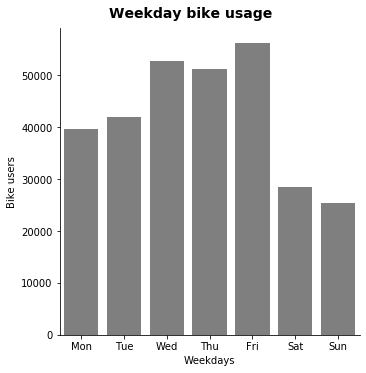

In [23]:
# create a list for weekday which we will use through out the exploration
base_color = sb.color_palette()[7]
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# plot start time usage
g = sb.catplot(data=bikes_df_clean, x='start_time_weekday', kind='count', color = base_color, order = weekday)
g.set_axis_labels("Weekdays", "Bike users")
g.fig.suptitle('Weekday bike usage', y=1.03, fontsize=14, fontweight='semibold');
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Weekday usage shows mid week spikes

### 1. Friday
### 2. Wednesday
### 3. Thursday

## The Duration of how long bike were used for the month

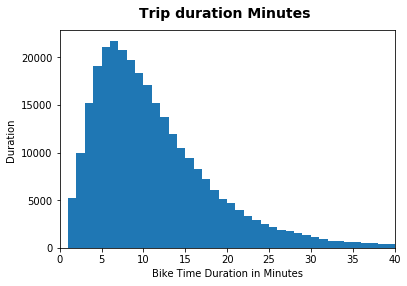

In [15]:
#plotting a hist for duration of minutes
bins = np.arange(0, bikes_df_clean['duration_min'].max()+1, 1)
plt.hist(data = bikes_df_clean, x = 'duration_min', bins = bins)
plt.xlim([0,40])
plt.title("Trip duration Minutes ", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Bike Time Duration in Minutes')
plt.ylabel('Duration ')
plt.show()
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### Duration shows that user's had a mean of 13 min per bike ride

## Duration start and end duration per user per weekday

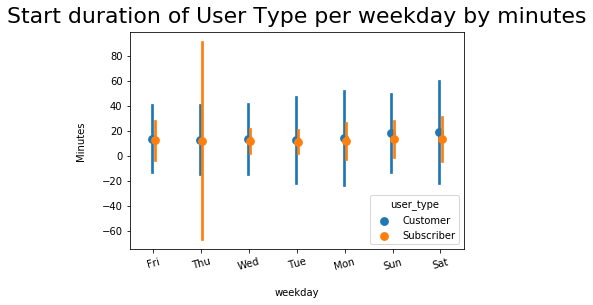

In [16]:
#Take start time, minutes durations and user type to plot
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.pointplot(data = bikes_df_clean, x = 'start_time_weekday', y= 'duration_min', hue = 'user_type',
            ci = 'sd', linestyles ="", dodge = True);
plt.xticks(rotation = 15);
plt.title('Start duration of User Type per weekday by minutes', fontsize=22, y=1.015)
plt.xlabel('weekday', labelpad=16)
plt.ylabel('Minutes', labelpad=16);

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

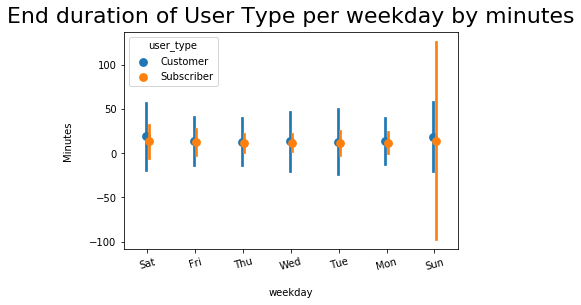

In [17]:
#Take end time, minutes durations and user type to plot
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.pointplot(data = bikes_df_clean, x = 'end_time_weekday', y= 'duration_min', hue = 'user_type',
            ci = 'sd', linestyles ="", dodge = True);
plt.xticks(rotation = 15);
plt.title('End duration of User Type per weekday by minutes', fontsize=22, y=1.015)
plt.xlabel('weekday', labelpad=16)
plt.ylabel('Minutes', labelpad=16);
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### Higher duration of rentals by subscribers starting on Thursday and ending on Sunday.

## The Count of Customers vs Subscribers

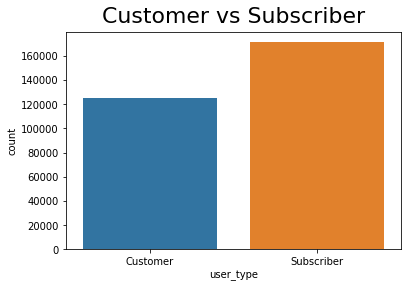

In [18]:
#plotting the user_types
sb.countplot(data=bikes_df_clean,x='user_type');
plt.title('Customer vs Subscriber', fontsize=22, y=1.015);
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### Subscribers are more frequent at 170,988 vs Customers at 124,866, totalling in 295,854 bike rentals for the month!

##  Customer vs Subscriber usage per weekday

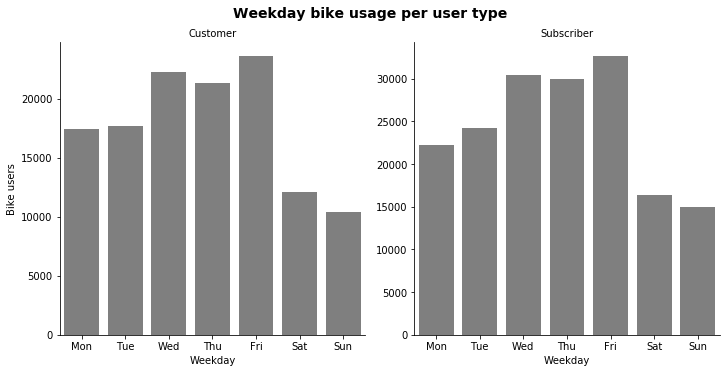

In [19]:

base_color = sb.color_palette()[7]
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=bikes_df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False,
            color = base_color, order = weekday)
g.set_axis_labels("Weekday", "Bike users")
g.set_titles("{col_name}")
g.fig.suptitle('Weekday bike usage per user type', y=1.03, fontsize=14, fontweight='semibold');
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Friday shows spikes in rentals with Wednesday and Thursday following.

## Percentage of bike rides per weekday

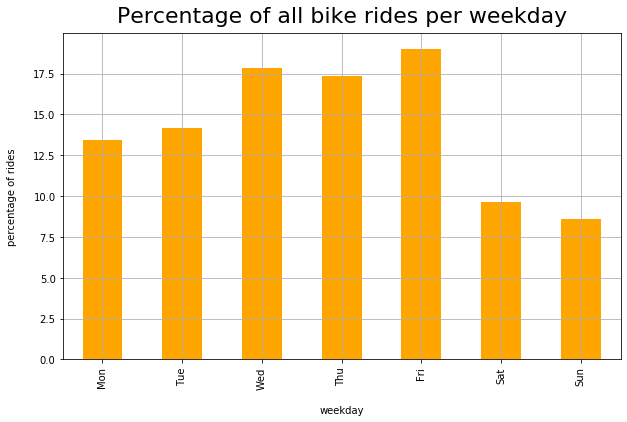

In [20]:
#calculate the percentage, start time
trip_by_weekday_df = bikes_df_clean.groupby('start_time_weekday').agg({'bike_id':'count'})
trip_by_weekday_df['perc'] = (trip_by_weekday_df['bike_id']/trip_by_weekday_df['bike_id'].sum())*100

#usage the percentage with weekday for the percentage of bike rides perweek
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
new_color = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']
trip_by_weekday_df.reindex(weekday)['perc'].plot( kind='bar', color=new_color, figsize=(10,6), legend=False)
plt.title('Percentage of all bike rides per weekday', fontsize=22, y=1.015)
plt.xlabel('weekday', labelpad=16)
plt.ylabel('percentage of rides', labelpad=16)
plt.savefig('pic17.png')
plt.grid()
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Ford GoBike- Baywheels start and end destinations

## Most popular start destination

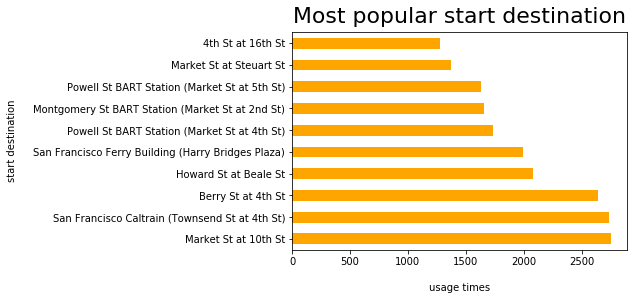

In [21]:
#plot the top ten popular start destionations
bikes_df_clean['start_station_name'].value_counts().head(10).plot(kind='barh', color= "orange");
plt.title('Most popular start destination', fontsize=22, y=1.015)
plt.xlabel('usage times', labelpad=16)
plt.ylabel('start destination', labelpad=16);
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

##  Market St at 10th St to top start point.

## Most popular end destinations

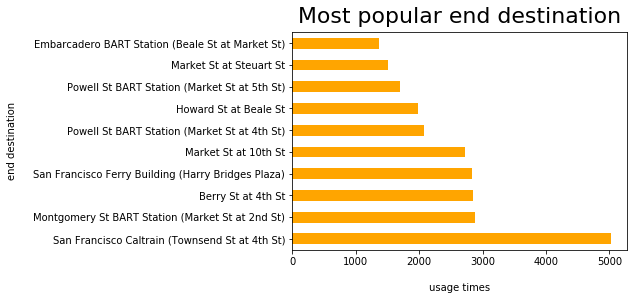

In [22]:
#plot the top ten popular end destionations
bikes_df_clean['end_station_name'].value_counts().head(10).plot(kind='barh', color= "orange");
plt.title('Most popular end destination', fontsize=22, y=1.015)
plt.xlabel('usage times', labelpad=16)
plt.ylabel('end destination', labelpad=16);
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## San Francisco Caltrain(Townsend St at 4th St) most popular end point